<a href="https://colab.research.google.com/github/RidhwanSani/RidhwanSani/blob/main/Project_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT - Sentiment Analysis

Research Question 2 : <br>
To Investigate The Best Model of Sentiment Analysis for Commodity News (Gold) Based on Different Features and Classification Model

NAME : MOHD RIDHWAN BIN ABDULLAH SANI<br>
MATRIC NO : P127015

In [ ]:
#import any necessary libraries
import pandas as pd

import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import utils
from sklearn.model_selection import train_test_split

READ THE FILE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gold dataset.csv')
df.head()

,News,PriceSentiment
0,"april gold down 20 cents to settle at $1,116.1...",negative
1,gold suffers third straight daily decline,negative
2,"Gold snaps three-day rally as Trump, lawmakers...",negative
3,"gold falls by rs 25 on sluggish demand, global...",negative
4,gold trades in red in early trade; eyes near-t...,negative


In [ ]:
df.shape

(7628, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   News            7628 non-null   object
 1   PriceSentiment  7628 non-null   object
dtypes: object(2)
memory usage: 119.3+ KB


In [ ]:
df.index = range(7628)
df['News'].apply(lambda x: len(x.split(' '))).sum()

68133

DATA VISUALISATION

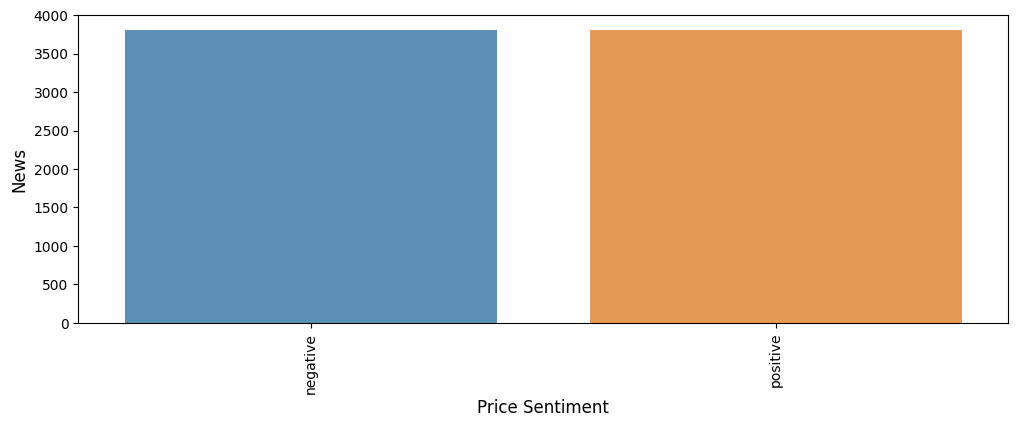

In [ ]:
cnt_pro = df['PriceSentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x = cnt_pro.index, y = cnt_pro.values, alpha=0.8)
plt.ylabel('News', fontsize=12)
plt.xlabel('Price Sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

PRE-PROCESSING

In [ ]:
def cleanText(text):
    text = text.lower() # make all words into lowercase
    text = re.sub(r'[^\w\s]', '', text) #remove non-alphanumeric characters but preserve the whitespace ; \W is equivalent of [^a-zA-Z0-9_]
    return text

df['News'] = df['News'].apply(cleanText)
df.head()

,News,PriceSentiment
0,april gold down 20 cents to settle at 111610oz,negative
1,gold suffers third straight daily decline,negative
2,gold snaps threeday rally as trump lawmakers r...,negative
3,gold falls by rs 25 on sluggish demand global ...,negative
4,gold trades in red in early trade eyes nearter...,negative


In [ ]:
#The following steps include:
# 1. train/test split of 80/20 (put test_size = 0.2)
# 2. tag every requirement (crowd feedback) with its class function.

import nltk
from gensim.models.doc2vec import TaggedDocument

nltk.download('punkt')

train, test = train_test_split(df, test_size=0.2, random_state=42) #train/test split of 80/20 (put test_size = 0.2)

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['News']), tags=[r.PriceSentiment]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['News']), tags=[r.PriceSentiment]), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Building the Final Vector Feature for the Classifier
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

IMPORT CLASSIFIER AND EVALUATION MATRICS

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [ ]:
#These are the evaluation metrics to evaluate our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

FEATURE BAG OF WORDS

In [ ]:
#split-data-train-test; #train/test split of 80/20 (put test_size = 0.2)
from sklearn.model_selection import train_test_split

sentences = df['News'].values
y = df['PriceSentiment'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,y, test_size=0.2, random_state=42)

In [ ]:
#countvectorizer is feature extraction of a bag-of-word feature
from sklearn.feature_extraction.text import CountVectorizer

#extract feature bag-of-words and fit into model for training
BOW = CountVectorizer()
BOW.fit(sentences_train)

X_train = BOW.transform(sentences_train)
X_test  = BOW.transform(sentences_test)

In [ ]:
#NB use MultinomialNB()
cNB = MultinomialNB()
cNB.fit(X_train, y_train)
y_pred_NB = cNB.predict(X_test)

#report
print('Testing accuracy NB (BOW): %s' % accuracy_score(y_test, y_pred_NB))
print('Testing F1 score NB (BOW): {}'.format(f1_score(y_test, y_pred_NB, average='macro')))
print('Testing Precision score NB (BOW): {}'.format(precision_score(y_test, y_pred_NB, labels=np.unique(y_pred_NB), average='macro')))
print('Testing Recall score NB(BOW): {}'.format(recall_score(y_test, y_pred_NB, average='macro')))

Testing accuracy NB (BOW): 0.9318479685452162
Testing F1 score NB (BOW): 0.9318450417766051
Testing Precision score NB (BOW): 0.931840980610408
Testing Recall score NB(BOW): 0.931900331221396


In [ ]:
#SVM
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
y_pred_SVM = clf.predict(X_test)

#report
print('Testing accuracy SVM (BOW):%s' % accuracy_score(y_test, y_pred_SVM))
print('Testing F1 score SVM (BOW): {}'.format(f1_score(y_test, y_pred_SVM, average='macro')))
print('Testing Precision score SVM (BOW): {}'.format(precision_score(y_test, y_pred_SVM, labels=np.unique(y_pred_SVM), average='macro')))
print('Testing Recall score SVM (BOW): {}'.format(recall_score(y_test, y_pred_SVM, average='macro')))

Testing accuracy SVM (BOW):0.9429882044560943
Testing F1 score SVM (BOW): 0.9429881799735902
Testing Precision score SVM (BOW): 0.9431416206669656
Testing Recall score SVM (BOW): 0.9431271560313904


In [ ]:
#LogisticRegression classifier
logreg = LogisticRegression(n_jobs=1, C=1e5,solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#report
print('Testing accuracy LR (BOW): %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score LR (BOW): {}'.format(f1_score(y_test, y_pred, average='macro')))
print('Testing Precision score LR (BOW): {}'.format(precision_score(y_test, y_pred, average='macro')))
print('Testing Recall score LR(BOW): {}'.format(recall_score(y_test, y_pred, average='macro')))

Testing accuracy LR (BOW): 0.9121887287024901
Testing F1 score LR (BOW): 0.9121813371813372
Testing Precision score LR (BOW): 0.9121677797933158
Testing Recall score LR(BOW): 0.9122074325531535


FEATURE-TF-IDF

In [ ]:
#split-data-train-test
from sklearn.model_selection import train_test_split

sentences = df['News'].values
y = df['PriceSentiment'].values
sentences_train, sentences_test, yy_train, yy_test = train_test_split(sentences,y, test_size=0.2, random_state=42) #_test and _train are modified

In [ ]:
#TfidfVectorizer is feature extraction of a TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF = TfidfVectorizer()
TFIDF.fit(sentences_train)
XX_train = TFIDF.transform(sentences_train) #_test and _train are modified
XX_test  = TFIDF.transform(sentences_test) #_test and _train are modified

In [ ]:
#NB use MultinomialNB()
cNB = MultinomialNB()
cNB.fit(XX_train, yy_train)
yy_pred_NB = cNB.predict(X_test)

#report
print('Testing accuracy NB (TFIDF): %s' % accuracy_score(yy_test, yy_pred_NB))
print('Testing F1 score NB (TFIDF): {}'.format(f1_score(yy_test, yy_pred_NB, average='macro')))
print('Testing Precision score NB (TFIDF): {}'.format(precision_score(yy_test, yy_pred_NB, labels=np.unique(yy_pred_NB), average='macro')))
print('Testing Recall score NB(TFIDF): {}'.format(recall_score(yy_test, yy_pred_NB, average='macro')))

Testing accuracy NB (TFIDF): 0.9331585845347313
Testing F1 score NB (TFIDF): 0.9331544509588017
Testing Precision score NB (TFIDF): 0.9331420915212313
Testing Recall score NB(TFIDF): 0.9331956680089608


In [ ]:
#SVM
clf = svm.SVC(gamma='scale')
clf.fit(XX_train, yy_train)
yy_pred_SVM = clf.predict(XX_test)

#report
print('Testing accuracy SVM (TFIDF):%s' % accuracy_score(yy_test, yy_pred_SVM))
print('Testing F1 score SVM (TFIDF): {}'.format(f1_score(yy_test, yy_pred_SVM, average='macro')))
print('Testing Precision score SVM (TFIDF): {}'.format(precision_score(yy_test, yy_pred_SVM, labels=np.unique(yy_pred_SVM), average='macro')))
print('Testing Recall score SVM (TFIDF): {}'.format(recall_score(yy_test, yy_pred_SVM, average='macro')))

Testing accuracy SVM (TFIDF):0.944954128440367
Testing F1 score SVM (TFIDF): 0.9449532774494984
Testing Precision score SVM (TFIDF): 0.9452421538842225
Testing Recall score SVM (TFIDF): 0.9451320075315073


In [ ]:
#LR
logreg = LogisticRegression(n_jobs=1, C=1e5,solver='lbfgs', max_iter=1000)
logreg.fit(XX_train, yy_train)
yy_pred = logreg.predict(XX_test)

#report
print('Testing accuracy LR (TFIDF): %s' % accuracy_score(yy_test, yy_pred))
print('Testing F1 score LR (TFIDF): {}'.format(f1_score(yy_test, yy_pred, average='macro')))
print('Testing Precision score LR (TFIDF): {}'.format(precision_score(yy_test, yy_pred, average='macro')))
print('Testing Recall score LR(TFIDF): {}'.format(recall_score(yy_test, yy_pred, average='macro')))

Testing accuracy LR (TFIDF): 0.90956749672346
Testing F1 score LR (TFIDF): 0.9095575540495271
Testing Precision score LR (TFIDF): 0.9095478595478595
Testing Recall score LR(TFIDF): 0.9095703742389467


# REPORT


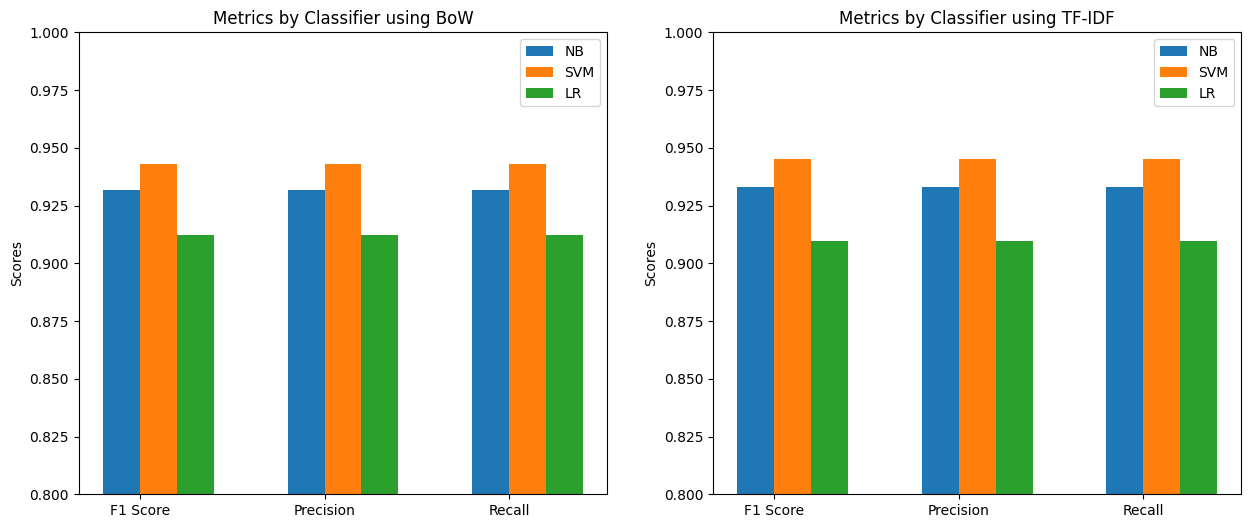

In [ ]:
# Plotting the chart with the metric values for BoW and TF-IDF features
import matplotlib.pyplot as plt
import numpy as np

# metric values for BoW and TF-IDF features
metrics_bow = {
    'NB': [0.9318450417766051, 0.931840980610408, 0.931900331221396],
    'SVM': [0.9429881799735902, 0.9431416206669656, 0.9431271560313904],
    'LR': [0.9121813371813372, 0.9121677797933158, 0.9122074325531535]
}

metrics_tfidf = {
    'NB': [0.9331544509588017, 0.9331420915212313, 0.9331956680089608],
    'SVM': [0.9449532774494984, 0.9452421538842225, 0.9451320075315073],
    'LR': [0.9095575540495271, 0.9095478595478595, 0.9095703742389467]
}

# Labels for the metrics and classifiers
metric_labels = ['F1 Score', 'Precision', 'Recall']
classifiers = ['NB', 'SVM', 'LR']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Function to plot metrics
def plot_metrics(ax, metrics, feature_type):
    x = np.arange(len(metric_labels))  # the label locations
    width = 0.2  # the width of the bars

    for i, (clf, scores) in enumerate(metrics.items()):
        ax.bar(x + i * width, scores, width, label=clf)

    ax.set_ylim([0.8, 1])  # Set y-axis limits to make differences more visible
    ax.set_ylabel('Scores')
    ax.set_title(f'Metrics by Classifier using {feature_type}')
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(metric_labels)
    ax.legend()

# Plot metrics for BoW
plot_metrics(axs[0], metrics_bow, 'BoW')

# Plot metrics for TF-IDF
plot_metrics(axs[1], metrics_tfidf, 'TF-IDF')

plt.show()


# Conclusion:


TF-IDF is the better feature extraction method
for this dataset. It slightly outperforms BoW, especially when used with the SVM and Naive Bayes classifiers.<br>

<br>
Support Vector Machine (SVM) emerges as the best-performing classifier, having the highest F1 Score, Precision, and Recall across both feature extraction methods (BoW and TF-IDF).
<br>
<br>To summarize, the most reliable and efficient approach for conducting sentiment analysis on the Gold News Dataset would be to employ TF-IDF as the feature extraction method and to use Support Vector Machine (SVM) as the classification algorithm.
